# **DL Project - Karteek Notebook**

#Citation and Web Links to Dataset

In [ ]:
#1
#https://snap.stanford.edu/data/web-Amazon.html

# J. McAuley and J. Leskovec. Hidden factors and hidden topics: understanding rating dimensions with review text. RecSys, 2013.
#http://i.stanford.edu/~julian/pdfs/recsys13.pdf

# Dataset statistics
# Number of reviews	34,686,770
# Number of users	6,643,669
# Number of products	2,441,053
# Users with > 50 reviews	56,772
# Median no. of words per review	82
# Timespan	Jun 1995 - Mar 2013

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# product/productId: B00006HAXW
# product/title: Rock Rhythm & Doo Wop: Greatest Early Rock
# product/price: unknown
# review/userId: A1RSDE90N6RSZF
# review/profileName: Joseph M. Kotow
# review/helpfulness: 9/9
# review/score: 5.0
# review/time: 1042502400
# review/summary: Pittsburgh - Home of the OLDIES
# review/text: I have all of the doo wop DVD's and this one is as good or better than the
# 1st ones. Remember once these performers are gone, we'll never get to see them again.
# Rhino did an excellent job and if you like or love doo wop and Rock n Roll you'll LOVE
# this DVD !!

# where

# product/productId: asin, e.g. amazon.com/dp/B00006HAXW
# product/title: title of the product
# product/price: price of the product
# review/userId: id of the user, e.g. A1RSDE90N6RSZF
# review/profileName: name of the user
# review/helpfulness: fraction of users who found the review helpful
# review/score: rating of the product
# review/time: time of the review (unix time)
# review/summary: review summary
# review/text: text of the review

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# @article{hou2024bridging,
#   title={Bridging Language and Items for Retrieval and Recommendation},
#   author={Hou, Yupeng and Li, Jiacheng and He, Zhankui and Yan, An and Chen, Xiusi and McAuley, Julian},
#   journal={arXiv preprint arXiv:2403.03952},
#   year={2024}
# }

In [ ]:
#2
# Amazon Product Reviews
#https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews
# Description
# This is a large-scale Amazon Reviews dataset collected in 2023. This dataset contains 48.19 million items, and 571.54 million reviews from 54.51 million users.

# Basic statistics
# Ratings:	571.54 million
# Users:	54.51 million
# Items:	48.19 million
# Timespan:	May 1996 - September 2023
# Metadata
# User Reviews (ratings, text, helpfulness votes, etc.);
# Item Metadata (descriptions, price, raw image, etc.);
# Links (user-item / bought together graphs).

#Citation
# 2023 version
# Bridging Language and Items for Retrieval and Recommendation
# Yupeng Hou, Jiacheng Li, Zhankui He, An Yan, Xiusi Chen, Julian McAuley
# arXiv
# pdf

#2b
#https://amazon-reviews-2023.github.io/
  ##https://amazon-reviews-2023.github.io/?utm_source=chatgpt.com (Hugging Face: https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023)
  ##https://arxiv.org/abs/2403.03952
  ##https://github.com/hyp1231/AmazonReviews2023


#Data Import

##Run below to list all json files

In [ ]:
# Full pipeline: list files, pick a category, load data, label, sample, split, save CSVs
# pip install datasets huggingface_hub  # uncomment if needed

from huggingface_hub import list_repo_files, hf_hub_download
from datasets import load_dataset, concatenate_datasets
import math, os

repo_id = "McAuley-Lab/Amazon-Reviews-2023"

# 1) List available raw review files in the repo (jsonl + parquet)
print("Listing available review files in repo (may take a few seconds)...")
files = list_repo_files(repo_id, repo_type="dataset")
review_jsonls = sorted([f for f in files if f.startswith("raw/review_categories/") and f.endswith(".jsonl")])
review_parquets = sorted([f for f in files if f.startswith("raw_review_") and f.endswith(".parquet")])
# print a friendly summary
print(f"Found {len(review_jsonls)} review JSONL files (examples):")
for p in review_jsonls[:50]:
    print("  ", p)
print(f"\nFound {len(review_parquets)} review Parquet files (examples):")
for p in review_parquets[:20]:
    print("  ", p)

Listing available review files in repo (may take a few seconds)...
Found 34 review JSONL files (examples):
   raw/review_categories/All_Beauty.jsonl
   raw/review_categories/Amazon_Fashion.jsonl
   raw/review_categories/Appliances.jsonl
   raw/review_categories/Arts_Crafts_and_Sewing.jsonl
   raw/review_categories/Automotive.jsonl
   raw/review_categories/Baby_Products.jsonl
   raw/review_categories/Beauty_and_Personal_Care.jsonl
   raw/review_categories/Books.jsonl
   raw/review_categories/CDs_and_Vinyl.jsonl
   raw/review_categories/Cell_Phones_and_Accessories.jsonl
   raw/review_categories/Clothing_Shoes_and_Jewelry.jsonl
   raw/review_categories/Digital_Music.jsonl
   raw/review_categories/Electronics.jsonl
   raw/review_categories/Gift_Cards.jsonl
   raw/review_categories/Grocery_and_Gourmet_Food.jsonl
   raw/review_categories/Handmade_Products.jsonl
   raw/review_categories/Health_and_Household.jsonl
   raw/review_categories/Health_and_Personal_Care.jsonl
   raw/review_categories

In [ ]:
# All_Beauty 700,000 data points = 0.7 M data points ##<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Amazon_Fashion 2 Million (=2M) data points
#Appliances 2M points
#Arts_Crafts_and_Sewing 7M
#Automotive 19M
#Baby_Products 6M
#Beauty_and_Personal_Care 23M
#Books 29M
#CDs_and_Vinyl 4M
#Cell_Phones_and_Accessories 20M
#Clothing_Shoes_and_Jewelry 66M
#Digital_Music 130,434 = 0.13 M only
#Electronics too large to import even (estimate by KP is it would be 50M to 70M data points).
#Gift_Cards 152410 = 0.15M only
#Grocery_and_Gourmet_Food 14M
#Handmade_Products 664162 = 0.66M only
#Health_and_Household 25M
#Health_and_Personal_Care 484121 = 0.4M ########<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Home_and_Kitchen 67M
#Industrial_and_Scientific 5.18M
#Kindle_Store 25M
#Magazine_Subscriptions 71,497
#Movies_and_TV 17.2M
#Musical_Instruments 3M
#Office_Products 12.8M
#Patio_Lawn_and_Garden 16.49M
#Pet_Supplies 16.8M
#Software 4.8M
#Sports_and_Outdoors 19.5M
#Subscription_Boxes 16216 only
#Tools_and_Home_Improvement 26.98M
#Toys_and_Games 16M
#Unknown Too large to import
#Video_Games 4.6M





##Select one json (data) from above and load that data below

In [ ]:
#  2) Choose a category to download.
# If you want "All_Beauty" (what you already used), leave as is. Replace string to load other category.
chosen_jsonl = "raw/review_categories/All_Beauty.jsonl"  # << change this to any path printed above
print("\nChosen JSONL:", chosen_jsonl)

# 3) Download chosen JSONL locally
local_jsonl = hf_hub_download(repo_id=repo_id, filename=chosen_jsonl, repo_type="dataset")
print("Downloaded to:", local_jsonl)

# 4) Load JSONL with datasets
#the object returned is: <class 'datasets.arrow_dataset.Dataset'>
ds = load_dataset("json", data_files=[local_jsonl], split="train")

'''
So:

✔ It's not a Pandas DataFrame
✔ It's not a Python list
✔ It's not a NumPy array

It is a special high-performance dataset type built on top of Apache Arrow.

📦 What is a HuggingFace Dataset? (Simple Explanation)

A datasets.Dataset:

stores data in a smart columnar format (Apache Arrow)

loads data lazily (only when needed)

supports batching, mapping, filtering

is optimized for speed & memory

behaves like a hybrid between:

a Pandas DataFrame

a list of dictionaries

a SQL table

But without taking huge memory.
'''

print("\nLoaded dataset rows:", ds.num_rows)
print("Columns:", ds.column_names)
print("Example row (first):", ds[0])


Chosen JSONL: raw/review_categories/All_Beauty.jsonl
Downloaded to: /root/.cache/huggingface/hub/datasets--McAuley-Lab--Amazon-Reviews-2023/snapshots/2b6d039ed471f2ba5fd2acb718bf33b0a7e5598e/raw/review_categories/All_Beauty.jsonl

Loaded dataset rows: 701528
Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
Example row (first): {'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [ ]:
# import shutil

# chosen_jsonl = "raw/review_categories/All_Beauty.jsonl"  # << change this to any path printed above

# # 0) Force new cache folder so JSON loader will work
# os.environ["HF_DATASETS_CACHE"] = "/content/cache"

# # 1) Download from HF
# cached_path = hf_hub_download(repo_id=repo_id, filename=chosen_jsonl, repo_type="dataset")
# print("Cached file:", cached_path)

# # 2) Copy to a normal location
# local_jsonl = "/content/All_Beauty.jsonl"     # or "/content/drive/MyDrive/All_Beauty.jsonl"
# shutil.copy(cached_path, local_jsonl)
# print("Copied to:", local_jsonl)

# # 3) Now load dataset normally
# ds = load_dataset("json", data_files=local_jsonl, split="train")
# print("\nLoaded dataset rows:", ds.num_rows)
# print("Columns:", ds.column_names)
# print("Example row (first):", ds[0])

# # 4) Save as CSV
# data_folder=os.path.join(GOOGLE_DRIVE_PATH, 'data')
# ds.to_csv(data_folder)
# print("Saved as All_Beauty.csv")

#Mount Drive

In [ ]:
# from google.colab import files
# import os

# os.listdir("/mnt/data/dl_project")


In [ ]:
# import os

# # List contents of the root of your mounted Google Drive
# print(os.listdir('/content/drive/MyDrive'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebooks', 'DL','Deep Learning Project Full', 'DL Team Project - Code, Files, Structure')
print(os.listdir(GOOGLE_DRIVE_PATH))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure'

In [ ]:
import sys

sys.path.append(GOOGLE_DRIVE_PATH)

In [ ]:
# if running locally set GOOGLE PATH
import sys
if 'google.colab' in sys.modules:
  print(f'Running in google colab. Our path is `{GOOGLE_DRIVE_PATH}`')
else:
  GOOGLE_DRIVE_PATH = '.'
  print('Running locally.')

Running in google colab. Our path is `/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure`


In [ ]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [ ]:
GOOGLE_DRIVE_PATH

'/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure'

In [ ]:
os.chdir(GOOGLE_DRIVE_PATH)

In [ ]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure


In [ ]:
import sys, torch, numpy, matplotlib, torchvision, yaml

#Autoreload

In [ ]:
# import imp

ModuleNotFoundError: No module named 'imp'

In [ ]:
# %load_ext autoreload
# # %reload_ext autoreload
# %autoreload 2

#Check Device

In [ ]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cpu


In [ ]:
# optional: check torch & CUDA
import torch
print("torch:", torch.__version__, "cuda_available:", torch.cuda.is_available())

torch: 2.9.0+cu126 cuda_available: False


#Save data as .csv in the data folder

In [ ]:
# data_folder=os.path.join(GOOGLE_DRIVE_PATH, 'data',"data.csv")

In [ ]:
# ds.to_csv(data_folder)
# print("Saved CSV to:", data_folder)

Creating CSV from Arrow format:   0%|          | 0/702 [00:00<?, ?ba/s]

Saved CSV to: /content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure/data/data.csv


In [ ]:
# !df -h

In [ ]:
# !du -sh /content/*

#Basic EDA

In [ ]:
# print(type(ds_All_Beauty))
print(type(ds))

<class 'datasets.arrow_dataset.Dataset'>


In [ ]:
# ds_All_Beauty[1]
ds[1]

{'rating': 4.0,
 'title': 'Works great but smells a little weird.',
 'text': 'This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)',
 'images': [],
 'asin': 'B081TJ8YS3',
 'parent_asin': 'B081TJ8YS3',
 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ',
 'timestamp': 1588615855070,
 'helpful_vote': 1,
 'verified_purchase': True}

In [ ]:
# # take first 10,000 samples
# # subset = ds_All_Beauty.select(range(10000))
# subset = ds.select(range(10000))

# # get min and max rating
# min_rating = min(subset["rating"])
# max_rating = max(subset["rating"])

# # get min and max rating
# min_rating = min(ds["rating"])
# max_rating = max(ds["rating"])

# min_rating, max_rating
# print("Min rating:", min_rating)
# print("Max rating:", max_rating)


In [ ]:
#do not run, takes a lot of time
# ds.to_pandas().describe(include="all")

In [ ]:
# ds_All_Beauty_DF=ds_All_Beauty.to_pandas()
ds_DF=ds.to_pandas()
# ds_All_Beauty.head()

In [ ]:
# ds_All_Beauty_DF

In [ ]:
# ds_All_Beauty_DF.head()
ds_DF.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


#Obsolete (delete) Mount Drive 2

In [ ]:
# import os

# os.chdir("/root/.cache/huggingface/hub")


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#Data Prep

**Walk-through of the whole script (simple step-by-step)

Install & imports — installs transformers, datasets, evaluate, others; imports PyTorch, HF libraries.

Seed & CUDA check — set a random seed for reproducibility and print whether GPU is available.

Load data — load_dataset("json", data_files=...) or similar loads your JSONL into a datasets.Dataset. Inspect columns with ds.column_names.

Drop extra columns — keep only text, title, and rating fields to simplify processing.

Preprocess — the preprocess_example_batch function chooses the best text field, cleans line breaks, parses rating fields, and builds label3 (3-class) and label5 (0..4) labels. Use ds.map(..., batched=True, remove_columns=...) to apply.

Filter — remove rows where text is empty or label5 is None.

Split — cast label3 to ClassLabel, then train_test_split to get train/val/test with stratify.

Balance train — optional oversampling of train to balance classes (only training split). You convert to pandas, oversample indices, and convert back.

Tokenizer — load AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True) and tokenize with max_length=256 (tokens).

Model — AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=num_labels) gets a pre-trained model with classification head.

Trainer setup — TrainingArguments + Trainer(...) with compute_metrics to calculate accuracy, precision, recall, f1.

Train — trainer.train() fine-tunes the model on train_tok.

Evaluate — trainer.evaluate(eval_dataset=test_tok) and trainer.predict(test_tok) give metrics and confusion matrix; the utilities you included compute timings, per-class metrics, and save results to CSV.

Save — trainer.save_model(...) and tokenizer.save_pretrained(...).**

##Import libraries

In [ ]:
# 0) Install required libraries
!pip install -q transformers datasets evaluate sentencepiece scikit-learn imbalanced-learn



# 1) Imports
import os, random
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
import evaluate
import torch
#

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.9 MB/s eta 0:00:00


##Set Seed

In [ ]:
# reproducibility
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)

##Check torch & device CUDA (or CPU used)

In [ ]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cpu


In [ ]:
# optional: check torch & CUDA
import torch
print("torch:", torch.__version__, "cuda_available:", torch.cuda.is_available())

torch: 2.9.0+cu126 cuda_available: False


##Check column names and length/rows of data

In [ ]:

# 2) Paths (edit)
# Option A: your JSONL(s) uploaded to Colab filesystem or Drive
DATA_FILES = {
    "all": ["/content/All_Beauty.jsonl"]  # replace with your path(s). You can list many files.
}
# Option B: if you already have an Arrow dataset, provide local folder path and use load_from_disk()
# e.g. ds = Dataset.load_from_disk('/content/amazon_reviews_arrow')

# 3) Load dataset (json lines -> datasets.arrow_dataset.Dataset)
# ds = load_dataset("json", data_files=DATA_FILES["all"], split="train")  # returns Datasetd
ds=load_dataset("json", data_files=[local_jsonl], split="train")
print("Loaded dataset:", ds)
print(ds.column_names)
print("Length:", len(ds))

## 4) Inspect columns you likely have: e.g. 'review_body', 'review_title', 'star_rating', 'product_category'
# If your column names differ, adjust below.



Loaded dataset: Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})
['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
Length: 701528


##CLEANING / PREPROCESSING: implement a map function for text cleaning and label creation

In [ ]:
# 5) CLEANING / PREPROCESSING: implement a map function for text cleaning and label creation
# def preprocess_example(ex):
#     #~~~~~~~~~~~~~~~~~~~~~~~Step A below — Pick the review text~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     # normalize fields: choose a primary text field
#     text = ""
#     for f in ("review_body", "review_text", "review"):
#         if f in ex and ex.get(f):
#             text = ex.get(f)
#             break
#     # fallback to title if no body
#     if not text:
#         text = ex.get("review_title", "") or ""
#     # basic cleaning (expand as needed)
#     text = text.replace("\n", " ").strip()
#     #~~~~~~~~~~~~~~~~~~~~~~~Step B below - Extract star rating and build labels~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     rating = None
#     for rfield in ("star_rating", "rating", "stars"):
#         if rfield in ex and ex.get(rfield) is not None:
#             try:
#                 rating = int(float(ex.get(rfield)))
#             except:
#                 rating = None
#             break
#     #~~~~~~~~~~~~~~~~~~~~~~~~~~~~Step C below — Convert rating → 3-class label~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     # label mapping: 3-class
#     if rating is None:
#         label3 = None
#         label5 = None
#     else:
#         if rating <= 2:
#             label3 = 0  # negative
#         elif rating == 3:
#             label3 = 1  # neutral
#         else:
#             label3 = 2  # positive
#         # we will use label5 (0..4) for training/testing  # CHANGED
#         label5 = rating - 1  # 0..4 for 1..5
#     #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     #~~~~~~~~~~~~~~~~~~~~~~~~~~~~Step D below — Return cleaned batch~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     #Below is the format BERT models expect and can be used by all other models too because (we can safely neglect all other columns like User ID, asin, parent asin, time stamp etc as the prediction is independent of these features/columns)
#     # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     return {"text": text, "rating": rating, "label3": label3, "label5": label5}

'''
Explanation of below function "preprocess_example_batch"

1. Create empty lists
Loop through each row in the batch

2. Tries multiple common names:
for f in ("text", "review_body", "review_text", "review", "title", "review_title"):
It picks the first matching non-empty field.
It also:
converts to string
removes newlines
trims spaces
If multiple text fields exist, it prefers full text over title.

3. Extract rating
Create sentiment labels
3-class (label3)
rating 1–2 → 0 (negative)
rating 3 → 1 (neutral)
rating 4–5 → 2 (positive)


4. Append results
Everything is added to the lists:
texts.append(text)
ratings.append(rating)
label3s.append(label3)
label5s.append(label5)
'''
# def preprocess_example_batch(examples):
#     texts = []
#     ratings = []
#     label3s = []
#     label5s = []

#     for i in range(len(examples[next(iter(examples))])):  # iterate by index in batch
#         # Step A: find text field (cover many common names)
#         text = ""
#         for f in ("text", "review_body", "review_text", "review", "title", "review_title"):
#             if f in examples and examples.get(f)[i]:
#                 # prefer full review text fields over title if both present
#                 # if 'text' exists it's usually the review body; if not, use title
#                 candidate = examples.get(f)[i]
#                 # if candidate is list/None-safe convert to str
#                 if candidate is None:
#                     continue
#                 text = str(candidate).replace("\n", " ").strip()
#                 # if it's only a short title but there is a longer 'text' field, prefer the longer
#                 if f == "text":
#                     break
#                 # otherwise keep searching to prefer 'text' if present later in the loop
#         # Step B: rating extraction (cover common names)
#         rating = None
#         for rfield in ("rating", "star_rating", "stars"):
#             if rfield in examples and examples.get(rfield)[i] is not None:
#                 try:
#                     rating_val = examples.get(rfield)[i]
#                     # rating might be str/float/int
#                     rating = int(float(rating_val))
#                 except:
#                     rating = None
#                 break

#         # Step C: map to labels
#         if rating is None:
#             label3 = None
#             label5 = None
#         else:
#             if rating <= 2:
#                 label3 = 0
#             elif rating == 3:
#                 label3 = 1
#             else:
#                 label3 = 2
#             label5 = rating - 1

#         texts.append(text)
#         ratings.append(rating)
#         label3s.append(label3)
#         label5s.append(label5)

#     return {"text": texts, "rating": ratings, "label3": label3s, "label5": label5s}

'\nExplanation of below function "preprocess_example_batch"\n\n1. Create empty lists\nLoop through each row in the batch\n\n2. Tries multiple common names:\nfor f in ("text", "review_body", "review_text", "review", "title", "review_title"):\nIt picks the first matching non-empty field.\nIt also:\nconverts to string\nremoves newlines\ntrims spaces\nIf multiple text fields exist, it prefers full text over title.\n\n3. Extract rating\nCreate sentiment labels\n3-class (label3)\nrating 1–2 → 0 (negative)\nrating 3 → 1 (neutral)\nrating 4–5 → 2 (positive)\n\n\n4. Append results\nEverything is added to the lists:\ntexts.append(text)\nratings.append(rating)\nlabel3s.append(label3)\nlabel5s.append(label5)\n'

In [ ]:
'''
Same as previous "preprocess_example_batch" function but, the below combines title and review text/body into single text field
'''
def preprocess_example_batch_combine(examples):
    texts = []
    ratings = []
    label3s = []
    label5s = []

    # find length of batch (works even if column names vary)
    batch_size = len(examples[next(iter(examples))])

    for i in range(batch_size):
        # --- Step A: extract possible text fields ---
        body = None
        title = None

        # common body field names
        for f in ("text", "review_body", "review_text", "review"):
            if f in examples and examples.get(f)[i]:
                cand = examples.get(f)[i]
                if cand is not None:
                    body = str(cand).replace("\n", " ").strip()
                    break

        # common title field names
        for t in ("title", "review_title"):
            if t in examples and examples.get(t)[i]:
                cand = examples.get(t)[i]
                if cand is not None:
                    title = str(cand).replace("\n", " ").strip()
                    break

        # --- Combine title and body ---
        # If both exist, join with a separator. If only one exists, use it.
        if title and body:
            combined = f"{title} — {body}"
        elif body:
            combined = body
        elif title:
            combined = title
        else:
            combined = ""  # empty string if nothing found

        # compact whitespace
        combined = " ".join(combined.split()).strip()

        # --- Step B: rating extraction (cover common names) ---
        rating = None
        for rfield in ("rating", "star_rating", "stars"):
            if rfield in examples and examples.get(rfield)[i] is not None:
                try:
                    rating_val = examples.get(rfield)[i]
                    rating = int(float(rating_val))
                except:
                    rating = None
                break

        # --- Step C: map to labels ---
        if rating is None:
            label3 = None
            label5 = None
        else:
            if rating <= 2:
                label3 = 0
            elif rating == 3:
                label3 = 1
            else:
                label3 = 2
            # map 1-5 -> 0-4
            label5 = rating - 1

        texts.append(combined)
        ratings.append(rating)
        label3s.append(label3)
        label5s.append(label5)

    return {"text": texts, "rating": ratings, "label3": label3s, "label5": label5s}


In [ ]:
# ##Uses the below function to process thousands of rows at once → faster.
# ##Removes all unwanted columns → keeps only text, rating, label3, label5.
# ds = ds.map(preprocess_example, remove_columns=[c for c in ds.column_names if c not in ("text","rating","label3","label3")])
# #load_dataset
# ##Below line of code Removes empty text and Removes rows where rating was missing (so label is None)
# # Model will now get clean, consistent, usable data.
# ds = ds.filter(lambda x: x["text"] is not None and x["text"].strip() != "" and x["label3"] is not None)
# print("After preprocess:", ds)
# print(ds[0])



# map in batched mode (faster) - Removes unwanted columns so only these remain "text, rating, label3, label5"
ds = ds.map(preprocess_example_batch_combine, batched=True, remove_columns=[c for c in ds.column_names if c not in ("text","rating","label3","label3")])

# quick sanity check before filtering
print("Example preprocessed row:", {k: ds[k][0] if len(ds)>0 else None for k in ("text","rating","label3")})
print("Num rows pre-filter:", len(ds))

Map:   0%|          | 0/701528 [00:00<?, ? examples/s]

Example preprocessed row: {'text': "Such a lovely scent but not overpowering. — This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'rating': 5.0, 'label3': 2}
Num rows pre-filter: 701528


In [ ]:
# filter out empty text and missing labels
ds = ds.filter(lambda x: x["text"] is not None and x["text"].strip() != "" and x["label3"] is not None)
print("After preprocess:", ds)
if len(ds) > 0:
    print(ds[0])

Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

After preprocess: Dataset({
    features: ['rating', 'text', 'label3', 'label5'],
    num_rows: 701528
})
{'rating': 5.0, 'text': "Such a lovely scent but not overpowering. — This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'label3': 2, 'label5': 4}


In [ ]:
print("Num rows after-filter:", len(ds))

Num rows after-filter: 701528


##Split the data into training, validation and testing

In [ ]:
# 6) OPTIONAL: remove extreme outliers in numeric metadata (example: helpful_votes) before scaling
# If you have numeric metadata fields, do outlier trimming on those. For pure text tasks skip.

# 7) TRAIN/VALID/TEST split (use stratify by label)
from datasets import ClassLabel
# convert label3 → ClassLabel
num_classes = len(set(ds["label3"]))
label3_class = ClassLabel(num_classes=num_classes)
ds = ds.cast_column("label3", label3_class)
train_and_val, test = ds.train_test_split(test_size=0.10, stratify_by_column="label3").values()
train, val = train_and_val.train_test_split(test_size=0.1111, stratify_by_column="label3").values()  # gives overall ~80/10/10
print("Sizes:", len(train), len(val), len(test))
#evaluate.load




Casting the dataset:   0%|          | 0/701528 [00:00<?, ? examples/s]

Sizes: 561229 70146 70153


In [ ]:
print("Num rows in ds:", len(ds))
print("Num rows in train after splitting:", len(train))

Num rows in ds: 701528
Num rows in train after splitting: 561229


##Class balancing - via Oversampling

In [ ]:
# 8) Address class imbalance: oversample training set to balance classes (only if desired)
# Below : Convert training split to pandas, oversample, and convert back to datasets.
def oversample_dataset(dset, label_col="label3"):
    df = dset.to_pandas()
    ros = RandomOverSampler(random_state=42)
    X = df.index.values.reshape(-1,1)  # identity feature just to oversample indices
    y = df[label_col].values
    X_res, y_res = ros.fit_resample(X, y)
    res_idx = X_res.flatten()
    df_res = df.iloc[res_idx].reset_index(drop=True)
    return Dataset.from_pandas(df_res)

print("Before oversample class counts:\n", train.to_pandas()["label3"].value_counts())
train_bal = oversample_dataset(train, label_col="label3")
print("After oversample class counts:\n", train_bal.to_pandas()["label3"].value_counts())

Before oversample class counts:
 label3
2    400090
0    116093
1     45046
Name: count, dtype: int64
After oversample class counts:
 label3
2    400090
1    400090
0    400090
Name: count, dtype: int64


In [ ]:
train_bal #rows in training after balancing/oversampling

Dataset({
    features: ['rating', 'text', 'label3', 'label5'],
    num_rows: 1200270
})

#Model Name Definition - Here BERT Model is Used. For other models use the space allocated to define and experiement your model

In below cell, either chose Bert or Distil-Bert or other models

In [ ]:

# MODEL_NAME = "bert-base-uncased"  # change to any HuggingFace model
MODEL_NAME = "distilbert-base-uncased"


##Tokenization with truncation

Why truncation is needed:

Some reviews are very long (hundreds of words).

Without truncation → BERT or other models will throw an error.

A fixed length (like 256 tokens) makes training faster and consistent.

Most useful information in Amazon reviews appears in the first part of the text.

Simply put:
  BERT/other models cannot read very long text → we cut it to a size it understands.

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1200270 [00:00<?, ? examples/s]

Map:   0%|          | 0/70146 [00:00<?, ? examples/s]

Map:   0%|          | 0/70153 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Utilities 1 (accuracy, precision, Recall, F1 etc)

#Model 1 - Transformer From Scratch and Tuning

In [ ]:
#Setup transformer

## Model 1 Basic training/testing code to test the model is setup correctly or not

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"
training_args = TrainingArguments(
    output_dir="/content/bert_amazon_run",
    # evaluation_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,  # <<<<<<<<<<<<<<<< EPOCHS  (low epochs for just code/debugging the pipeline)<<<<<<<<<<<<<<<<<
    weight_decay=0.01,
    learning_rate=2e-5,
    fp16=torch.cuda.is_available(),
    push_to_hub=False,
    logging_steps=100
)

#evaluate.load
data_collator = DataCollatorWithPadding(tokenizer)

# ensure label column used by Trainer
train_tok = train_tok.rename_column("label3", "labels")
val_tok   = val_tok.rename_column("label3", "labels")
test_tok  = test_tok.rename_column("label3", "labels")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    # tokenizer=tokenizer,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)
#report_to
# 12) Train
trainer.train()
# 13) Evaluate on test
metrics = trainer.evaluate(eval_dataset=test_tok)
print("Test metrics:", metrics)

# 14) Save model to Drive or local
trainer.save_model("/content/bert_amazon_saved")
tokenizer.save_pretrained("/content/bert_amazon_saved")
print("Saved model to /content/bert_amazon_saved")

NameError: name 'TrainingArguments' is not defined

##Model 1 - Evaluate basic trainer model

In [ ]:
#After training, replace your evaluation block with this to get a full report on the test set:
# === UPDATED: evaluate on test with detailed report ===
metrics = trainer.evaluate(eval_dataset=test_tok)
print("Test metrics (from Trainer):", metrics)

# Detailed predictions for test set
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

# Per-class report (0..4 correspond to ratings 1..5)
print("\nClassification Report (labels 0..4 == ratings 1..5):")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix (rows=true, cols=pred):\n", cm)


In [ ]:
#Curves + metrics from your existing Trainer run (no retraining)

# === A1) Get logs from your finished run and plot learning curves ===
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Collect logs (training_loss, eval_loss, eval_accuracy, steps/epochs)
logs = pd.DataFrame(trainer.state.log_history)

# Clean up typical columns if present
keep_cols = [c for c in logs.columns if c in [
    'loss','learning_rate','epoch','eval_loss','eval_accuracy','eval_f1','eval_precision','eval_recall','step'
]]
display(logs[keep_cols].fillna(method='ffill'))

# Plot training loss over steps (if 'loss' exists)
if 'loss' in logs.columns:
    plt.figure()
    logs.loc[logs['loss'].notna(), 'loss'].reset_index(drop=True).plot()
    plt.title('Training loss over time')
    plt.xlabel('Logging step index')
    plt.ylabel('Training loss')
    plt.show()

# Plot eval loss per epoch (if available)
if 'eval_loss' in logs.columns and 'epoch' in logs.columns:
    plt.figure()
    ev = logs.dropna(subset=['eval_loss','epoch']).drop_duplicates(subset=['epoch'])
    plt.plot(ev['epoch'], ev['eval_loss'], marker='o')
    plt.title('Validation loss per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Eval loss')
    plt.show()

# Plot eval accuracy per epoch (if available)
if 'eval_accuracy' in logs.columns and 'epoch' in logs.columns:
    plt.figure()
    ev = logs.dropna(subset=['eval_accuracy','epoch']).drop_duplicates(subset=['epoch'])
    plt.plot(ev['epoch'], ev['eval_accuracy'], marker='o')
    plt.title('Validation accuracy per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Eval accuracy')
    plt.show()

# === A2) Detailed metrics on the test set: classification report + confusion matrix ===
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pred = trainer.predict(test_tok)
y_true = pred.label_ids
y_prob = pred.predictions
y_pred = np.argmax(y_prob, axis=1)

print("\nClassification report (test):")
print(classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(values_format='d')
plt.title('Confusion Matrix (Test)')
plt.show()


#Model 2 - BERT (Karteek, Mark)

## Model 2 - BERT - Basic training/testing code to test the model is setup correctly or not

In [ ]:
len(train_tok)

1200270

In [ ]:
# sample subset to develop the code and debug
subset_traindata=train_tok.select(range(10000))
final_train_data=subset_traindata
len(final_train_data)


# final_train_data=train_tok

10000

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"
training_args = TrainingArguments(
    output_dir="/content/bert_amazon_run",
    # evaluation_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,  # <<<<<<<<<<<<<<<< EPOCHS  (low epochs for just code/debugging the pipeline)<<<<<<<<<<<<<<<<<
    weight_decay=0.01,
    learning_rate=2e-5,
    fp16=torch.cuda.is_available(),
    push_to_hub=False,
    logging_steps=100
)

#evaluate.load
data_collator = DataCollatorWithPadding(tokenizer)

# ensure label column used by Trainer
final_train_data = final_train_data.rename_column("label3", "labels")
val_tok   = val_tok.rename_column("label3", "labels")
test_tok  = test_tok.rename_column("label3", "labels")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=final_train_data,
    eval_dataset=val_tok,
    # tokenizer=tokenizer,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)
#report_to
# 12) Train
trainer.train()
# 13) Evaluate on test
metrics = trainer.evaluate(eval_dataset=test_tok)
print("Test metrics:", metrics)

# 14) Save model to Drive or local
trainer.save_model("/content/bert_amazon_saved")
tokenizer.save_pretrained("/content/bert_amazon_saved")
print("Saved model to /content/bert_amazon_saved")

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.290200,0.299150,0.900009,0.791453,0.703482,0.718568,0.886710,0.900009,0.885925
2,0.223400,0.284279,0.901662,0.766085,0.753842,0.757812,0.896682,0.901662,0.898512
3,0.151600,0.326299,0.902589,0.771195,0.755042,0.761845,0.897529,0.902589,0.899716


Test metrics: {'eval_loss': 0.3327082693576813, 'eval_accuracy': 0.9015722777358061, 'eval_precision_macro': 0.77048670920496, 'eval_recall_macro': 0.7540706474395918, 'eval_f1_macro': 0.7609829670581393, 'eval_precision_weighted': 0.8964833333809175, 'eval_recall_weighted': 0.9015722777358061, 'eval_f1_weighted': 0.8986787535043561, 'eval_runtime': 100.243, 'eval_samples_per_second': 699.829, 'eval_steps_per_second': 21.877, 'epoch': 3.0}
Saved model to /content/bert_amazon_saved


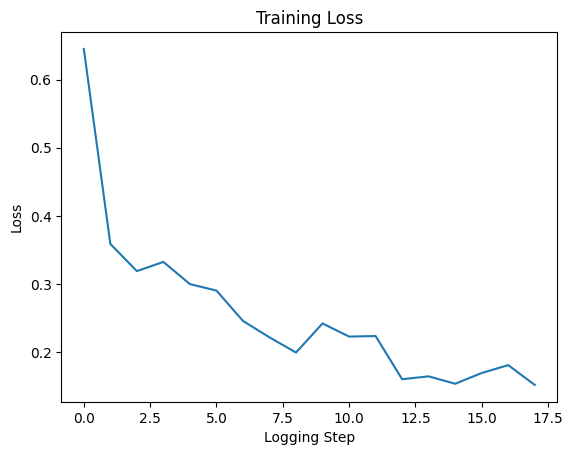

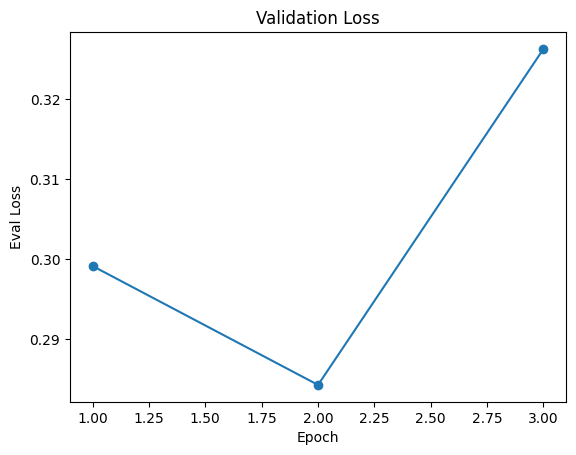

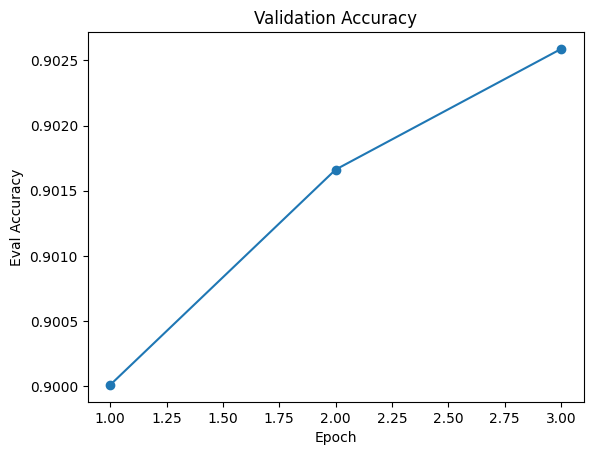

In [ ]:
# Plot learning curves from the finished run
plot_learning_curves(trainer)



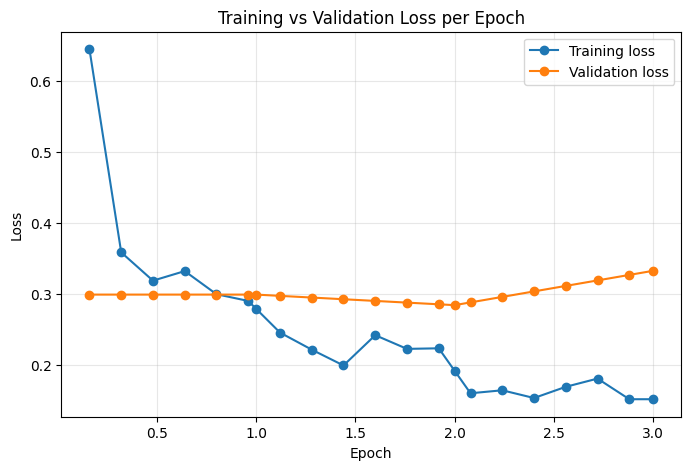

In [ ]:
plot_loss_vs_epoch(trainer)

In [ ]:
# print(ds.column_names)

['rating', 'text', 'label3', 'label5']


##Model 2 - BERT -Evaluate basic trainer model

In [ ]:
# Use your shared evaluator that also times prediction and returns detailed metrics
eval_res = evaluate_trainer_with_timing(trainer, test_tok)
print("Eval metrics:", eval_res["metrics"])

Eval metrics: {'accuracy': 0.9015722777358061, 'precision': 0.8964833333809175, 'recall': 0.9015722777358061, 'f1': 0.8986787535043561, 'precision_per_class': [0.8434759322487781, 0.5129346904156065, 0.955049504950495], 'recall_per_class': [0.8682378884983806, 0.4295862191440242, 0.9643878346763712], 'f1_per_class': [0.8556778049443086, 0.4675751425533971, 0.959695953676712], 'support_per_class': [14511, 5631, 50011], 'confusion_matrix': [[12599, 1159, 753], [1695, 2419, 1517], [643, 1138, 48230]]}


In [ ]:
  #may be this cell is not needed (and instead below cell could be used)
  #After training, replace your evaluation block with this to get a full report on the test set:
  # === UPDATED: evaluate on test with detailed report ===
  metrics = trainer.evaluate(eval_dataset=test_tok)
  print("Test metrics (from Trainer):", metrics)
#train_tok
  # Detailed predictions for test set
  pred_out = trainer.predict(test_tok)
  y_true = pred_out.label_ids
  y_pred = pred_out.predictions.argmax(axis=-1)

  # Per-class report (0..4 correspond to ratings 1..5)
  print("\nClassification Report (labels 0..4 == ratings 1..5):")
  print(classification_report(y_true, y_pred, digits=4))

  # Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  print("\nConfusion Matrix (rows=true, cols=pred):\n", cm)


Test metrics (from Trainer): {'eval_loss': 0.3327082693576813, 'eval_accuracy': 0.9015722777358061, 'eval_precision_macro': 0.77048670920496, 'eval_recall_macro': 0.7540706474395918, 'eval_f1_macro': 0.7609829670581393, 'eval_precision_weighted': 0.8964833333809175, 'eval_recall_weighted': 0.9015722777358061, 'eval_f1_weighted': 0.8986787535043561, 'eval_runtime': 100.8606, 'eval_samples_per_second': 695.544, 'eval_steps_per_second': 21.743, 'epoch': 3.0}

Classification Report (labels 0..4 == ratings 1..5):
              precision    recall  f1-score   support

           0     0.8435    0.8682    0.8557     14511
           1     0.5129    0.4296    0.4676      5631
           2     0.9550    0.9644    0.9597     50011

    accuracy                         0.9016     70153
   macro avg     0.7705    0.7541    0.7610     70153
weighted avg     0.8965    0.9016    0.8987     70153


Confusion Matrix (rows=true, cols=pred):
 [[12599  1159   753]
 [ 1695  2419  1517]
 [  643  1138 48230]

In [ ]:
#train_tok
#may be above cell is not needed
# Get timed evaluation + metrics (uses your compute_classification_metrics etc.)
eval_res = evaluate_trainer_with_timing(trainer, test_tok)
print("Test metrics (weighted):", eval_res["metrics"])

# Classification report + confusion matrix (sklearn) using returned preds
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report (labels 0..4 == ratings 1..5):")
print(classification_report(eval_res["y_true"], eval_res["y_pred"], digits=4))

cm = confusion_matrix(eval_res["y_true"], eval_res["y_pred"])
print("\nConfusion Matrix (rows=true, cols=pred):\n", cm)


Test metrics (weighted): {'accuracy': 0.9015722777358061, 'precision': 0.8964833333809175, 'recall': 0.9015722777358061, 'f1': 0.8986787535043561, 'precision_per_class': [0.8434759322487781, 0.5129346904156065, 0.955049504950495], 'recall_per_class': [0.8682378884983806, 0.4295862191440242, 0.9643878346763712], 'f1_per_class': [0.8556778049443086, 0.4675751425533971, 0.959695953676712], 'support_per_class': [14511, 5631, 50011], 'confusion_matrix': [[12599, 1159, 753], [1695, 2419, 1517], [643, 1138, 48230]]}

Classification Report (labels 0..4 == ratings 1..5):
              precision    recall  f1-score   support

           0     0.8435    0.8682    0.8557     14511
           1     0.5129    0.4296    0.4676      5631
           2     0.9550    0.9644    0.9597     50011

    accuracy                         0.9016     70153
   macro avg     0.7705    0.7541    0.7610     70153
weighted avg     0.8965    0.9016    0.8987     70153


Confusion Matrix (rows=true, cols=pred):
 [[12599

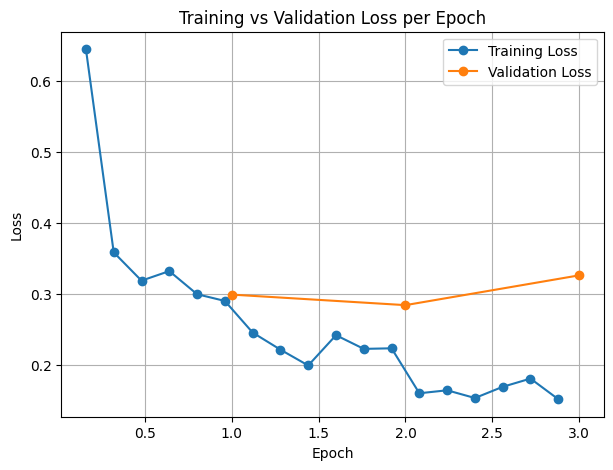


Classification report (test):
              precision    recall  f1-score   support

           0     0.8435    0.8682    0.8557     14511
           1     0.5129    0.4296    0.4676      5631
           2     0.9550    0.9644    0.9597     50011

    accuracy                         0.9016     70153
   macro avg     0.7705    0.7541    0.7610     70153
weighted avg     0.8965    0.9016    0.8987     70153



<Figure size 640x480 with 0 Axes>

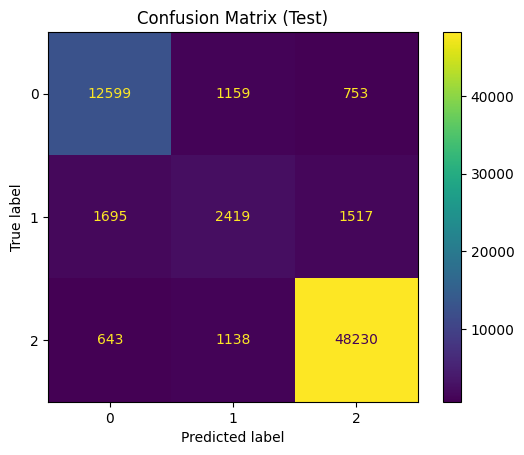

In [ ]:
#train_tok
#Curves + metrics from your existing Trainer run (no retraining)

# === A1) Get logs from your finished run and plot learning curves ===
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Collect logs (training_loss, eval_loss, eval_accuracy, steps/epochs)
logs = pd.DataFrame(trainer.state.log_history)

# # Clean up typical columns if present
# keep_cols = [c for c in logs.columns if c in [
#     'loss','learning_rate','epoch','eval_loss','eval_accuracy','eval_f1','eval_precision','eval_recall','step'
# ]]
# display(logs[keep_cols].fillna(method='ffill'))

# # Plot training loss over steps (if 'loss' exists)
# if 'loss' in logs.columns:
#     plt.figure()
#     logs.loc[logs['loss'].notna(), 'loss'].reset_index(drop=True).plot()
#     plt.title('Training loss over time')
#     plt.xlabel('Logging step index')
#     plt.ylabel('Training loss')
#     plt.show()

# # Plot eval loss per epoch (if available)
# if 'eval_loss' in logs.columns and 'epoch' in logs.columns:
#     plt.figure()
#     ev = logs.dropna(subset=['eval_loss','epoch']).drop_duplicates(subset=['epoch'])
#     plt.plot(ev['epoch'], ev['eval_loss'], marker='o')
#     plt.title('Validation loss per epoch')
#     plt.xlabel('Epoch')
#     plt.ylabel('Eval loss')
#     plt.show()

# # Plot eval accuracy per epoch (if available)
# if 'eval_accuracy' in logs.columns and 'epoch' in logs.columns:
#     plt.figure()
#     ev = logs.dropna(subset=['eval_accuracy','epoch']).drop_duplicates(subset=['epoch'])
#     plt.plot(ev['epoch'], ev['eval_accuracy'], marker='o')
#     plt.title('Validation accuracy per epoch')
#     plt.xlabel('Epoch')
#     plt.ylabel('Eval accuracy')
#     plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Get training loss entries (they appear many times per epoch)
train_loss_points = logs[['epoch', 'loss']].dropna()

# For training loss: average losses per epoch
train_loss_per_epoch = train_loss_points.groupby('epoch')['loss'].mean()

# For validation loss: one entry per epoch
val_loss_points = logs[['epoch', 'eval_loss']].dropna().drop_duplicates(subset=['epoch'])
val_loss_per_epoch = val_loss_points.set_index('epoch')['eval_loss']

# --- Plot ---
plt.figure(figsize=(7,5))
plt.plot(train_loss_per_epoch.index, train_loss_per_epoch.values, marker='o', label='Training Loss')
plt.plot(val_loss_per_epoch.index, val_loss_per_epoch.values, marker='o', label='Validation Loss')

plt.title("Training vs Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# === A2) Detailed metrics on the test set: classification report + confusion matrix ===
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pred = trainer.predict(test_tok)
y_true = pred.label_ids
y_prob = pred.predictions
y_pred = np.argmax(y_prob, axis=1)

print("\nClassification report (test):")
print(classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(values_format='d')
plt.title('Confusion Matrix (Test)')
plt.show()

In [ ]:
#val train loss vs epoch


##Model 2 - Bert -Grid search and plotting loss or accuracy curves - #In the below code ensure you choose epochs and grid search params and their param values per your liking

In [ ]:
#In the below code ensure you choose epochs and grid search params and their param values per your liking

In [ ]:
#Team member flexible grid search

# =========================
# Flexible Grid Search (add-on)
# =========================
import os, time, math, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from copy import deepcopy
import torch
from transformers import TrainingArguments, Trainer, AutoModelForSequenceClassification

# ---- Reproducibility (optional but helpful) ----
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ---- BASELINE: take hyperparams from your existing training_args ----
BASE = {
    "learning_rate": training_args.learning_rate,
    "weight_decay": training_args.weight_decay,
    "per_device_train_batch_size": training_args.per_device_train_batch_size,
    "per_device_eval_batch_size": training_args.per_device_eval_batch_size,
    "num_train_epochs": training_args.num_train_epochs,
    "warmup_ratio": getattr(training_args, "warmup_ratio", 0.0),
    "lr_scheduler_type": getattr(training_args, "lr_scheduler_type", "linear"),
    "adam_beta1": getattr(training_args, "adam_beta1", 0.9),
    "adam_beta2": getattr(training_args, "adam_beta2", 0.999),
    "adam_epsilon": getattr(training_args, "adam_epsilon", 1e-8),
    "gradient_accumulation_steps": getattr(training_args, "gradient_accumulation_steps", 1),
    "max_grad_norm": getattr(training_args, "max_grad_norm", 1.0),
}

# ---- Define your flexible grid here.
# Any key can be:
# - a list of values to try (e.g., [2e-5, 3e-5, 5e-5])
# - an empty list or None to SKIP (keep BASE value)
# - a single value (treated as just that one option)
# Teammates can freely add/remove keys below.
PARAM_GRID = {
    "learning_rate": [2e-5, 3e-5, 5e-5],
    "weight_decay": [0.0, 0.01],
    "per_device_train_batch_size": [16],       # keep fixed here; teammates can expand
    "num_train_epochs": [3],                   # keep fixed for fair compare/time
    "warmup_ratio": [0.0, 0.06],
    "lr_scheduler_type": ["linear", "cosine"], # categorical works too
    "gradient_accumulation_steps": [1, 2],
    # Examples teammates might toggle on:
    # "adam_beta1": [],
    # "adam_beta2": [],
    # "adam_epsilon": [],
    # "max_grad_norm": [],
}

# ---- Normalize grid: remove skipped keys, wrap singletons as lists ----
norm_grid = {}
for k, v in PARAM_GRID.items():
    if v is None:
        continue
    if isinstance(v, (list, tuple)) and len(v) == 0:
        continue
    if not isinstance(v, (list, tuple)):
        v = [v]
    norm_grid[k] = list(v)

# If everything skipped, nothing to do
if len(norm_grid) == 0:
    print("No grid parameters provided. Nothing to search.")
else:
    # Build list of trial configs by overriding BASE with each combination in norm_grid
    keys = list(norm_grid.keys())
    values_product = list(product(*[norm_grid[k] for k in keys]))
    print(f"Total trials: {len(values_product)}")

    results = []
    all_logs = []

    def make_outdir(idx):
        return f"/content/bert_grid_trial_{idx:03d}"

    start_all = time.time()

    for idx, combo in enumerate(values_product, start=1):
        cfg = deepcopy(BASE)
        for k, v in zip(keys, combo):
            cfg[k] = v

        outdir = make_outdir(idx)
        # Fresh model per trial
        trial_model = AutoModelForSequenceClassification.from_pretrained(
            MODEL_NAME, num_labels=model.config.num_labels
        )

        # Build trial TrainingArguments from BASE + overrides (keep your other defaults)
        trial_args = TrainingArguments(
            output_dir=outdir,
            evaluation_strategy="epoch",
            save_strategy="no",  # no checkpoint saving to speed up grid
            per_device_train_batch_size=cfg["per_device_train_batch_size"],
            per_device_eval_batch_size=BASE["per_device_eval_batch_size"],  # keep eval BS stable
            num_train_epochs=cfg["num_train_epochs"],
            weight_decay=cfg["weight_decay"],
            learning_rate=cfg["learning_rate"],
            warmup_ratio=cfg["warmup_ratio"],
            lr_scheduler_type=cfg["lr_scheduler_type"],
            gradient_accumulation_steps=cfg["gradient_accumulation_steps"],
            adam_beta1=cfg["adam_beta1"],
            adam_beta2=cfg["adam_beta2"],
            adam_epsilon=cfg["adam_epsilon"],
            max_grad_norm=cfg["max_grad_norm"],
            fp16=training_args.fp16,
            logging_steps=training_args.logging_steps,
            push_to_hub=False,
            report_to=[],           # keep local
            seed=SEED,
            data_seed=SEED,
        )

        trial_trainer = Trainer(
            model=trial_model,
            args=trial_args,
            train_dataset=train_tok,
            eval_dataset=val_tok,
            tokenizer=tokenizer,
            data_collator=data_collator,
            compute_metrics=compute_metrics
        )

        t0 = time.time()
        train_out = trial_trainer.train()
        eval_metrics = trial_trainer.evaluate()
        dur = time.time() - t0

        # Pull standard metrics safely
        eval_loss = float(eval_metrics.get("eval_loss", np.nan))
        # try to find eval_*accuracy key
        eval_acc_key = next((k for k in eval_metrics.keys() if "accuracy" in k), None)
        eval_acc = float(eval_metrics.get(eval_acc_key, np.nan)) if eval_acc_key else np.nan

        trial_row = {
            "trial": idx,
            "duration_sec": round(dur, 2),
            **cfg,
            "eval_loss": eval_loss,
            "eval_accuracy": eval_acc,
        }
        results.append(trial_row)

        # Collect logs for plotting per-epoch curves per trial
        logs = pd.DataFrame(trial_trainer.state.log_history)
        logs["trial"] = idx
        for k in keys:
            logs[k] = cfg[k]
        all_logs.append(logs)

        # Free CUDA memory between trials
        del trial_trainer, trial_model
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    total_dur = time.time() - start_all

    results_df = pd.DataFrame(results)
    display(results_df.sort_values(["eval_accuracy", "eval_loss"], ascending=[False, True]).reset_index(drop=True))

    # ---- Pick best by highest accuracy; tie-breaker lowest eval_loss ----
    results_df["_neg_acc"] = -results_df["eval_accuracy"].fillna(-1e9)
    results_df["_loss"] = results_df["eval_loss"].fillna(1e9)
    best_idx = results_df.sort_values(["_neg_acc", "_loss"], ascending=[True, True]).index[0]
    best_row = results_df.loc[best_idx].drop(labels=["_neg_acc", "_loss"])
    print("\n=== BEST CONFIG (by highest eval_accuracy, tie: lowest eval_loss) ===")
    for k, v in best_row.items():
        print(f"{k}: {v}")
    print(f"\nTotal grid time (sec): {round(total_dur, 2)}")

    # Save CSV of all trials
    results_csv_path = "/content/bert_grid_results.csv"
    results_df.drop(columns=["_neg_acc","_loss"], errors="ignore").to_csv(results_csv_path, index=False)
    print(f"\nSaved all trial results to: {results_csv_path}")

    # ---- Per-parameter plots: effect on accuracy and loss (averaged over other params) ----
    logs_df = pd.concat(all_logs, ignore_index=True)

    # Helper to decide numeric vs categorical
    def is_numeric_list(vals):
        try:
            _ = [float(v) for v in vals if v is not None]
            return True
        except Exception:
            return False

    # Plot aggregated bars/lines for each searched parameter
    for p in keys:
        unique_vals = sorted(list({r[p] for _, r in results_df.iterrows()}), key=lambda x: str(x))
        if len(unique_vals) <= 1:
            continue  # nothing to compare

        grp = results_df.groupby(p).agg(
            mean_acc=("eval_accuracy", "mean"),
            std_acc=("eval_accuracy", "std"),
            mean_loss=("eval_loss", "mean"),
            std_loss=("eval_loss", "std"),
            trials=("eval_accuracy", "count")
        ).reset_index()

        # ACCURACY
        plt.figure()
        if is_numeric_list(unique_vals):
            plt.errorbar(grp[p], grp["mean_acc"], yerr=grp["std_acc"], marker='o')
            plt.xlabel(p); plt.ylabel("Validation accuracy")
            plt.title(f"Effect of {p} on validation accuracy")
        else:
            plt.bar([str(v) for v in grp[p]], grp["mean_acc"])
            plt.xlabel(p); plt.ylabel("Validation accuracy")
            plt.title(f"Effect of {p} on validation accuracy")
        plt.show()

        # LOSS
        plt.figure()
        if is_numeric_list(unique_vals):
            plt.errorbar(grp[p], grp["mean_loss"], yerr=grp["std_loss"], marker='o')
            plt.xlabel(p); plt.ylabel("Validation loss")
            plt.title(f"Effect of {p} on validation loss")
        else:
            plt.bar([str(v) for v in grp[p]], grp["mean_loss"])
            plt.xlabel(p); plt.ylabel("Validation loss")
            plt.title(f"Effect of {p} on validation loss")
        plt.show()

    # ---- (Optional) Per-trial per-epoch curves (accuracy & loss) ----
    # These show learning curves for each trial; useful if grid is small.
    if {"eval_accuracy","epoch","trial"}.issubset(logs_df.columns):
        plt.figure()
        for t in sorted(results_df["trial"].unique()):
            ev = logs_df[(logs_df["trial"]==t) & logs_df["eval_accuracy"].notna() & logs_df["epoch"].notna()]
            ev = ev.drop_duplicates(subset=["epoch"])
            if not ev.empty:
                plt.plot(ev["epoch"], ev["eval_accuracy"], marker='o', label=f"trial {t}")
        plt.xlabel("Epoch"); plt.ylabel("Validation accuracy"); plt.title("Validation accuracy per epoch (all trials)")
        plt.legend()
        plt.show()

    if {"eval_loss","epoch","trial"}.issubset(logs_df.columns):
        plt.figure()
        for t in sorted(results_df["trial"].unique()):
            ev = logs_df[(logs_df["trial"]==t) & logs_df["eval_loss"].notna() & logs_df["epoch"].notna()]
            ev = ev.drop_duplicates(subset=["epoch"])
            if not ev.empty:
                plt.plot(ev["epoch"], ev["eval_loss"], marker='o', label=f"trial {t}")
        plt.xlabel("Epoch"); plt.ylabel("Validation loss"); plt.title("Validation loss per epoch (all trials)")
        plt.legend()
        plt.show()


#Model 3 - Fine-tuned open-weight LLM

In [ ]:
# Model 3 setup code goes here

#Model 4 - Fine-tuned OpenAI LLM

In [ ]:
# Model 4 setup code goes here

#Model 5 - Zero Shot

In [ ]:
# Model 5 setup code goes here